In [1]:
%matplotlib inline

# Analyze 4i data

This tutorial shows how to apply Squidpy for the analysis of 4i data.

The data used here was obtained from `Gut2018-ap`. We provide a
pre-processed subset of the data, in `anndata.AnnData` format. For
details on how it was pre-processed, please refer to the original paper.

::: seealso
See `sphx_glr_auto_tutorials_tutorial_imc.py` for additional analysis
examples.
:::

## Import packages & data

To run the notebook locally, create a conda environment as *conda env
create -f environment.yml* using this
[environment.yml](https://github.com/scverse/squidpy_notebooks/blob/main/environment.yml).


> IDF: Interpreted the samples to be HeLa cells

In [2]:
import squidpy as sq

print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.four_i()

squidpy==1.2.3


100%|████████████████████| 173M/173M [01:39<00:00, 1.82MB/s]
/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
adata

AnnData object with n_obs × n_vars = 270876 × 43
    obs: 'x', 'y', 'is_nucleous', 'is_cytplasm', 'cell_id', 'leiden', 'cluster'
    uns: 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

First, let\'s visualize cluster annotation in spatial context with
`squidpy.pl.spatial_scatter`.


/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


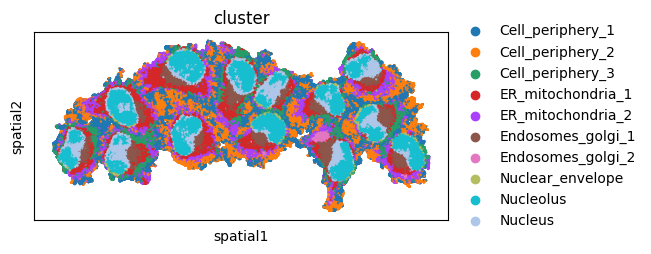

In [5]:
sq.pl.spatial_scatter(adata, shape=None, color="cluster", size=1)

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


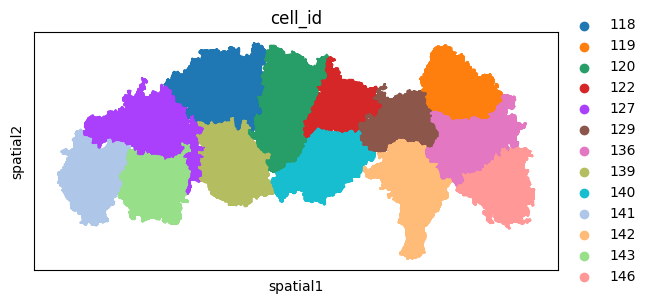

In [6]:
sq.pl.spatial_scatter(adata, shape=None, color="cell_id", size=1)

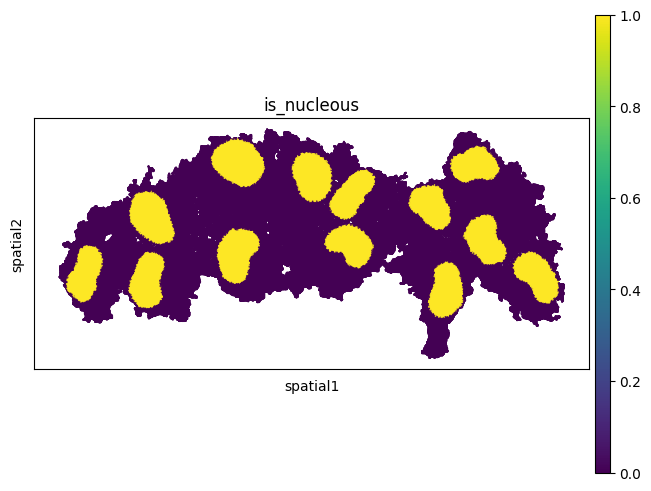

In [8]:
sq.pl.spatial_scatter(adata, shape=None, color="is_nucleous", size=1)

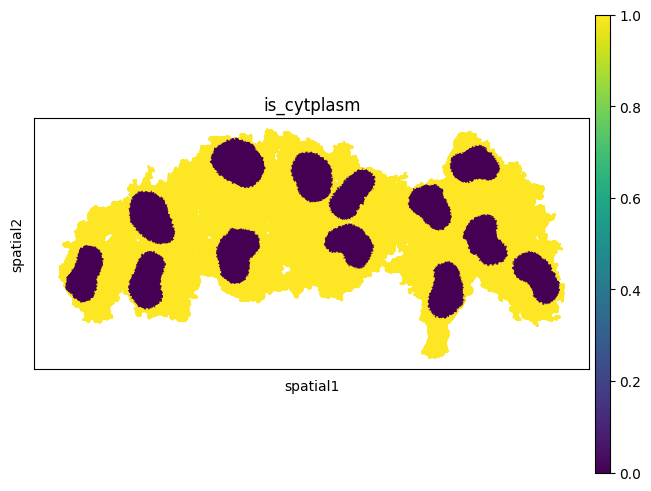

In [10]:
sq.pl.spatial_scatter(adata, shape=None, color="is_cytplasm", size=1)

# Neighborhood enrichment analysis

Similar to other spatial data, we can investigate spatial organization
of clusters in a quantitative way, by computing a neighborhood
enrichment score. You can compute such score with the following
function: `squidpy.gr.nhood_enrichment`. In short, it\'s an enrichment
score on spatial proximity of clusters: if spots belonging to two
different clusters are often close to each other, then they will have a
high score and can be defined as being *enriched*. On the other hand, if
they are far apart, the score will be low and they can be defined as
*depleted*. This score is based on a permutation-based test, and you can
set the number of permutations with the [n_perms]{.title-ref} argument
(default is 1000).

Since the function works on a connectivity matrix, we need to compute
that as well. This can be done with `squidpy.gr.spatial_neighbors`.
Please see `sphx_glr_auto_examples_graph_compute_spatial_neighbors.py`
for more details of how this function works.

Finally, we\'ll directly visualize the results with
`squidpy.pl.nhood_enrichment`. We\'ll add a dendrogram to the heatmap
computed with linkage method *ward*.


/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|████████████████████| 1000/1000 [00:09<00:00, 101.10/s]


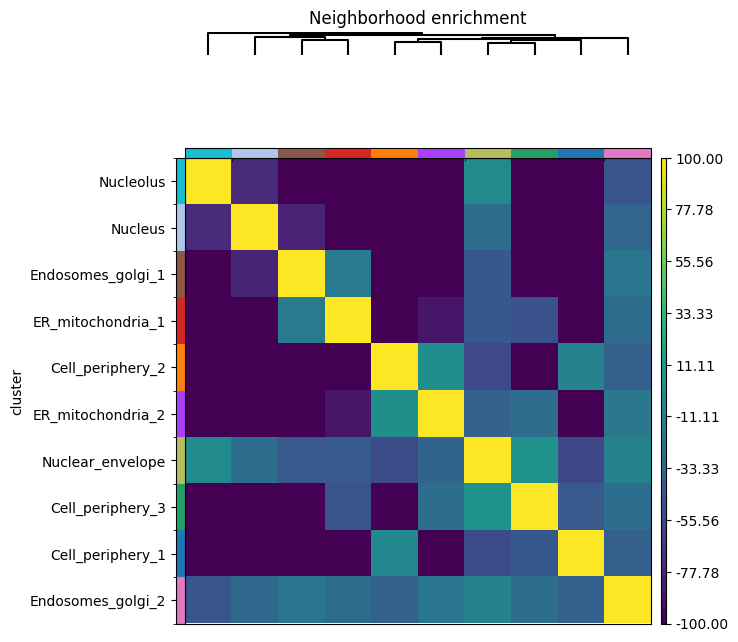

In [11]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="cluster")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", method="ward", vmin=-100, vmax=100)

A similar analysis can be performed with
`squidpy.gr.interaction_matrix`. The function computes the number of
shared edges in the neighbor graph between clusters. Please see
`sphx_glr_auto_examples_graph_compute_interaction_matrix.py` for more
details of how this function works.


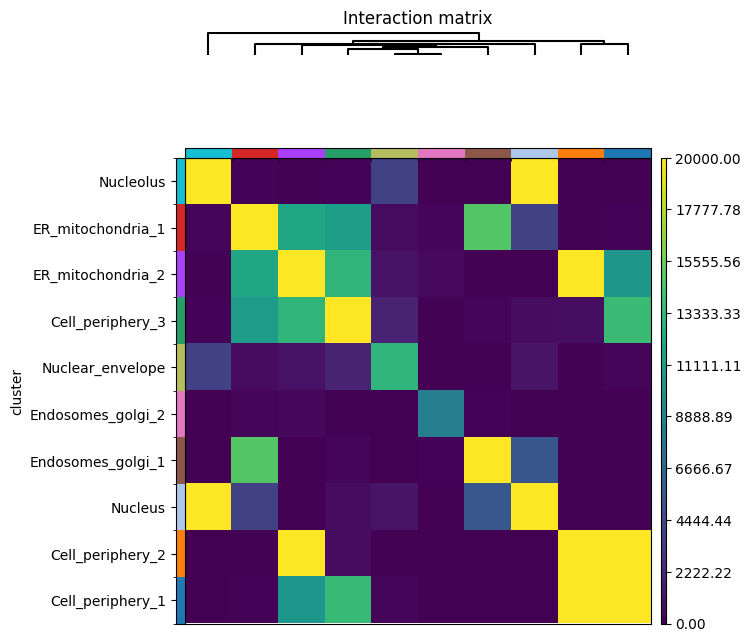

In [12]:
sq.gr.interaction_matrix(adata, cluster_key="cluster")
sq.pl.interaction_matrix(adata, cluster_key="cluster", method="ward", vmax=20000)

Additional analyses to gain quantitative understanding of spatial
patterning of sub-cellular observations are: -
`sphx_glr_auto_examples_graph_compute_ripley.py` for Ripley\'s
statistics. - `sphx_glr_auto_examples_graph_compute_co_occurrence.py`
for co-occurrence score.

# Spatially variable genes with spatial autocorrelation statistics

With Squidpy we can investigate spatial variability of gene expression.
This is an example of a function that only supports 2D data.
`squidpy.gr.spatial_autocorr` conveniently wraps two spatial
autocorrelation statistics: *Moran\'s I* and *Geary\'s C*. They provide
a score on the degree of spatial variability of gene expression. The
statistic as well as the p-value are computed for each gene, and FDR
correction is performed. For the purpose of this tutorial, let\'s
compute the *Moran\'s I* score. See
`sphx_glr_auto_examples_graph_compute_moran.py` for more details.


In [13]:
adata.var_names_make_unique()
sq.gr.spatial_autocorr(adata, mode="moran")
adata.uns["moranI"].head(10)

,I,pval_norm,var_norm,pval_norm_fdr_bh
Yap/Taz,0.972969,0.0,0.000001,0.0
CRT,0.958588,0.0,0.000001,0.0
TUBA1A,0.939611,0.0,0.000001,0.0
NUPS,0.915056,0.0,0.000001,0.0
TFRC,0.895769,0.0,0.000001,0.0
HSP60,0.889343,0.0,0.000001,0.0
Actin,0.879215,0.0,0.000001,0.0
CTNNB1,0.876511,0.0,0.000001,0.0
Climp63,0.873844,0.0,0.000001,0.0
VINC,0.862487,0.0,0.000001,0.0


The results are stored in [adata.uns\[\'moranI\'\]]{.title-ref} and we
can visualize selected genes with `squidpy.pl.spatial_scatter`.


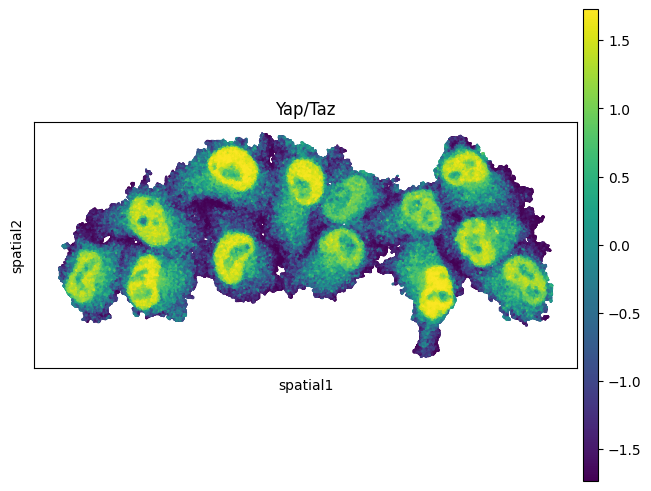

In [15]:
sq.pl.spatial_scatter(adata, shape=None, color="Yap/Taz", size=1)

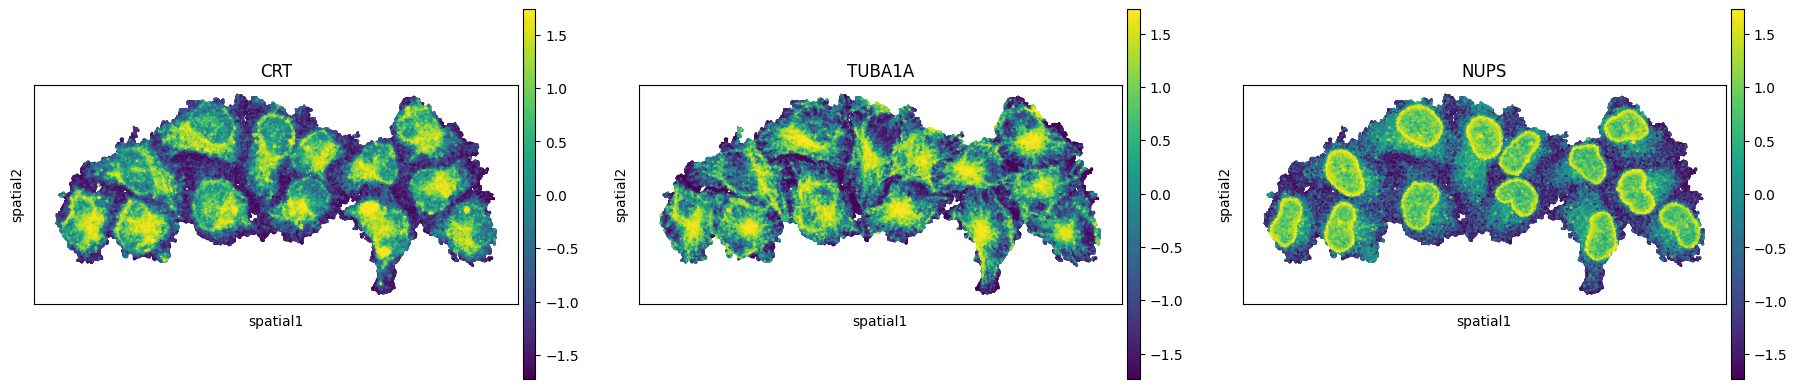

In [16]:
sq.pl.spatial_scatter(adata, shape=None, color=['CRT', 'TUBA1A', 'NUPS'], size=1)